In [1]:
%matplotlib inline
import os
import numpy as np
import flopy

In [2]:
ml = flopy.modflow.Modflow.load('freyberg.nam', version='mf2005', verbose=True, model_ws='data')


Creating new model with name: freyberg
--------------------------------------------------

Parsing the namefile --> data/freyberg.nam
Setting filehandles:

--------------------------------------------------
External unit dictionary:
{51: <flopy.utils.mfreadnam.NamData object at 0x109fc1410>, 2: <flopy.utils.mfreadnam.NamData object at 0x109fc11d0>, 11: <flopy.utils.mfreadnam.NamData object at 0x109fc1210>, 13: <flopy.utils.mfreadnam.NamData object at 0x109fc1250>, 14: <flopy.utils.mfreadnam.NamData object at 0x109fc13d0>, 15: <flopy.utils.mfreadnam.NamData object at 0x109fc1290>, 18: <flopy.utils.mfreadnam.NamData object at 0x109fc1310>, 19: <flopy.utils.mfreadnam.NamData object at 0x109fc1350>, 20: <flopy.utils.mfreadnam.NamData object at 0x109fc12d0>, 53: <flopy.utils.mfreadnam.NamData object at 0x109fc1490>, 52: <flopy.utils.mfreadnam.NamData object at 0x109fc1450>, 27: <flopy.utils.mfreadnam.NamData object at 0x109fc1390>}
--------------------------------------------------

loadin


Plotting Packages
plotting DIS package util_2d instance: top
plotting DIS package util_3d instance: botm
plotting BAS6 package util_3d instance: _ModflowBas__ibound
plotting BAS6 package util_3d instance: strt
plotting LPF package util_3d instance: wetdry
plotting LPF package util_3d instance: vka
plotting LPF package util_3d instance: hani
plotting LPF package util_3d instance: vkcb
plotting LPF package util_3d instance: hk
plotting LPF package util_3d instance: sy
plotting LPF package util_3d instance: ss
plotting RIV package mflist instance: stress_period_data
plotting RCH package transient_2d instance: rech
plotting WEL package mflist instance: stress_period_data
 


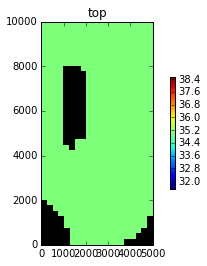

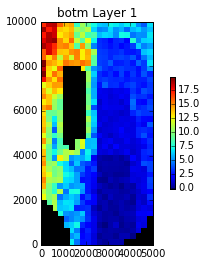

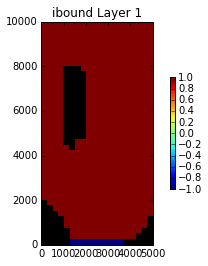

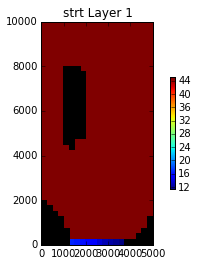

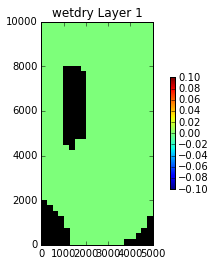

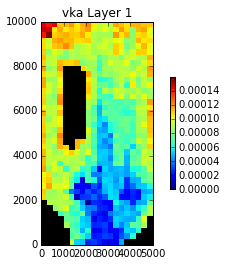

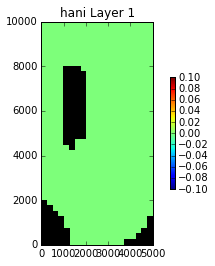

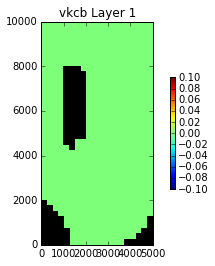

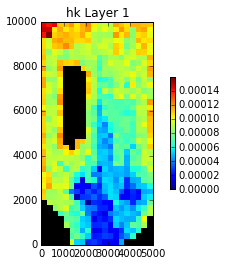

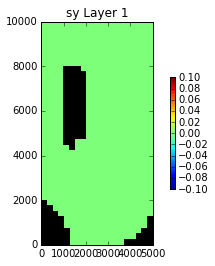

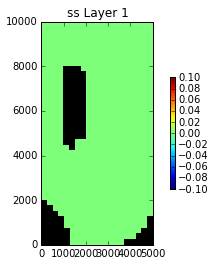

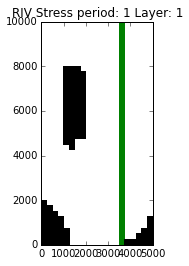

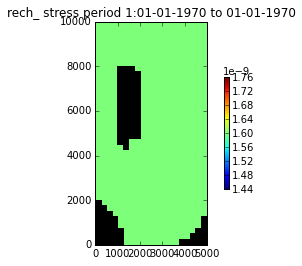

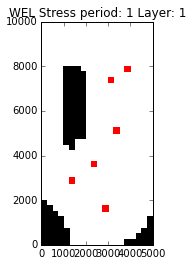

In [3]:
ml.plot()

plotting DIS package util_2d instance: top
plotting DIS package util_3d instance: botm


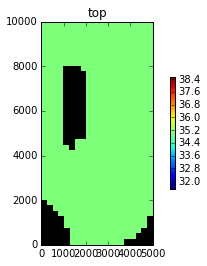

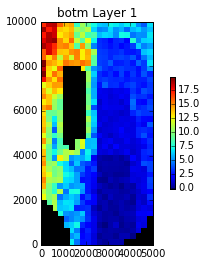

In [4]:
ml.dis.plot()